In [30]:
from google.colab import drive

drive.mount('/content/drive')
path = 'drive/MyDrive/MUIA/TFM/Code/TDA_Stocks_Spain-main'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
from os import listdir

#Leer todos los nombres de los ficheros de las empresas sobre las que realizar analisis

data_path = f'{path}/data/Cotizaciones_RAW'
file_names = [f for f in listdir(data_path)]
print(file_names)

['FER.MC.csv', 'TLGO.MC.csv', 'AMS.MC.csv', 'ALB.MC.csv', 'NHH.MC.csv', 'GCO.MC.csv', 'SAB.MC.csv', 'IDR.MC.csv', 'ECR.MC.csv', 'REP.MC.csv', 'TEF.MC.csv', 'APPS.MC.csv', 'GEST.MC.csv', 'VIS.MC.csv', 'FDR.MC.csv', 'ROVI.MC.csv', 'TL5.MC.csv', 'DIA.MC.csv', 'AENA.MC.csv', 'ALM.MC.csv', 'A3M.MC.csv', 'ACS.MC.csv', 'RED.MC.csv', 'GRE.MC.csv', 'MRL.MC.csv', 'SLR.MC.csv', 'SAN.MC.csv', 'EBRO.MC.csv', 'DOM.MC.csv', 'SCYR.MC.csv', 'UNI.MC.csv', 'ITX.MC.csv', 'PSG.MC.csv', 'CIE.MC.csv', 'BKT.MC.csv', 'ELE.MC.csv', 'GRF.MC.csv', 'ACX.MC.csv', 'NTGY.MC.csv', 'VID.MC.csv', 'CAF.MC.csv', 'ANA.MC.csv', 'IAG.MC.csv', 'MAP.MC.csv', 'CABK.MC.csv', 'BBVA.MC.csv', 'ENG.MC.csv', 'ENC.MC.csv', 'EDR.MC.csv', 'FAE.MC.csv', 'MTS.MC.csv', 'COL.MC.csv', 'IBE.MC.csv', 'CLNX.MC.csv', 'MEL.MC.csv', 'LOG.MC.csv', 'PHM.MC.csv']


In [32]:
import pandas as pd

#Create a dictionary with all the historical data of each company
data_companies = {}

for file in file_names:
  df = pd.read_csv(f'{data_path}/{file}')
  ticker_name = file[:-7]
  data_companies[ticker_name] = df




In [33]:
df = data_companies['ACS']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,9.196650,9.616650,9.066650,9.196650,2.913879,220908
1,2002-01-03,9.673320,9.673320,9.269990,9.673320,3.064908,187420
2,2002-01-04,9.433320,9.766650,9.286650,9.433320,2.988867,245490
3,2002-01-07,9.039990,9.796650,9.039990,9.039990,2.864243,192721
4,2002-01-08,9.083320,9.249990,9.066650,9.083320,2.877972,305129
...,...,...,...,...,...,...,...
5439,2023-03-14,28.000000,28.889999,28.000000,28.709999,28.709999,871796
5440,2023-03-15,28.799999,28.900000,28.030001,28.030001,28.030001,843638
5441,2023-03-16,28.309999,28.629999,27.930000,28.469999,28.469999,697969
5442,2023-03-17,28.670000,28.730000,27.790001,28.160000,28.160000,4329498


In [34]:
# Comprobación inicial para ver cual es el historico de datos disponible
def check_first_date (data_companies):
  companies = []
  starts = []

  for company in data_companies:
    df = data_companies[company]
    #print(company)
    #print(df)
    start = df.iloc[0][0]
    companies.append(company)
    starts.append(start)

  data = {'Company': companies, 'Starting_Data': starts}
  df = pd.DataFrame(data)

  return df

check_first_date(data_companies)

,Company,Starting_Data
0,FER,2000-01-03
1,TLGO,2015-05-07
2,AMS,2010-04-29
3,ALB,2000-01-03
4,NHH,2000-01-03
5,GCO,2000-01-03
6,SAB,2000-01-03
7,IDR,2000-10-03
8,ECR,2000-01-03
9,REP,2000-01-03


In [35]:
# Eliminar datos previos a 2018
i = 0
data_companies_clean = {}
for company in data_companies:
  df = data_companies[company]
  # Dropping the rows of team 1 and team 2
  df = df[df["Date"].str.contains("2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017") == False]
  data_companies_clean[company] = df

# Comprobacion que todas las empresas tienen datos a partir del mismo punto de inicio
check_first_date(data_companies_clean)

,Company,Starting_Data
0,FER,2018-01-02
1,TLGO,2018-01-02
2,AMS,2018-01-02
3,ALB,2018-01-02
4,NHH,2018-01-02
5,GCO,2018-01-02
6,SAB,2018-01-02
7,IDR,2018-01-02
8,ECR,2018-01-02
9,REP,2018-01-02


In [36]:
df = data_companies_clean['FDR']
df

,Date,Open,High,Low,Close,Adj Close,Volume
2596,2018-01-02,12.000000,12.230000,11.61,11.705000,10.818427,114738
2597,2018-01-03,11.600000,11.940000,11.10,11.820000,10.924715,209951
2598,2018-01-04,11.820000,12.180000,11.82,11.900000,10.998656,100011
2599,2018-01-05,11.980000,12.280000,11.90,12.100000,11.183509,697619
2600,2018-01-08,12.260000,12.380000,12.10,12.180000,11.257448,99972
...,...,...,...,...,...,...,...
3927,2023-03-14,16.070000,16.860001,16.07,16.660000,16.660000,1503995
3928,2023-03-15,16.549999,16.570000,15.75,15.790000,15.790000,875459
3929,2023-03-16,16.059999,16.370001,15.86,16.309999,16.309999,705969
3930,2023-03-17,16.389999,16.639999,15.85,16.070000,16.070000,2169672


In [37]:
import numpy as np
print(np.shape(data_companies_clean['A3M']))
print(np.shape(data_companies_clean['ACS']))
print(np.shape(data_companies_clean['ROVI']))

(1336, 7)
(1336, 7)
(1336, 7)


In [38]:
# Crear un dataframe que sirva como entrada al modelo TDA
# Columna1 = fecha. El resto de columnas serán cada una de las empresas
# Filas = cada fila representa el precio de cierre en el dia determinado


dates = data_companies_clean['FDR'][['Date']].values.reshape(-1,).tolist()


df_TDA = pd.DataFrame()
df_TDA['Date'] = dates
#print(df_TDA)


for company in data_companies_clean:
  #print(company)
  prices = data_companies_clean[company][['Close']].values.reshape(-1,).tolist()
  #print(prices)
  df_TDA[company] = prices

df_TDA


,Date,FER,TLGO,AMS,ALB,NHH,GCO,SAB,IDR,ECR,...,ENC,EDR,FAE,MTS,COL,IBE,CLNX,MEL,LOG,PHM
0,2018-01-02,19.084999,4.397,60.220001,48.349998,5.905,36.840000,1.655001,11.48,2.986,...,5.470,4.962,2.960,27.990000,8.221,6.403,19.068811,11.655,19.200001,30.840122
1,2018-01-03,19.040001,4.430,60.500000,49.299999,6.000,36.250000,1.676181,11.65,3.150,...,5.415,4.930,3.020,28.730000,8.385,6.442,19.108475,11.670,19.340000,31.200125
2,2018-01-04,19.625000,4.470,61.820000,49.750000,6.050,37.000000,1.717063,11.72,3.190,...,5.510,4.810,3.020,28.655001,8.480,6.662,19.751886,11.570,19.350000,31.560125
3,2018-01-05,19.775000,4.450,63.500000,50.299999,5.995,37.099998,1.738736,11.80,3.148,...,5.520,4.880,3.060,28.389999,8.505,6.738,19.804770,11.820,19.389999,31.536125
4,2018-01-08,19.650000,4.405,62.959999,49.700001,6.000,37.400002,1.729870,11.71,3.150,...,5.680,4.895,3.045,29.215000,8.600,6.680,19.760700,11.770,19.200001,32.136127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2023-03-14,26.900000,3.190,60.459999,44.849998,3.660,29.049999,1.139000,11.57,4.235,...,3.650,5.640,3.220,27.490000,6.130,10.860,35.860001,6.190,22.299999,46.810001
1332,2023-03-15,26.219999,3.065,58.160000,44.450001,3.510,27.950001,1.019500,11.34,3.980,...,3.446,5.350,3.210,25.045000,5.945,10.875,35.400002,5.845,22.040001,46.259998
1333,2023-03-16,26.700001,3.075,59.400002,44.799999,3.620,27.900000,1.014500,11.37,4.055,...,3.520,5.500,3.205,25.430000,5.855,11.050,35.320000,5.960,22.299999,45.840000
1334,2023-03-17,26.510000,3.025,58.320000,45.299999,3.585,27.799999,0.982600,11.22,3.985,...,3.450,5.490,3.160,25.000000,5.810,10.920,34.099998,5.695,22.280001,45.509998


In [39]:
# Verificar si hay datos que sean 0
0 in df_TDA.values

False

In [40]:
# Verificar si algun valor es null
df_TDA.isnull().sum()

Date    0
FER     0
TLGO    0
AMS     0
ALB     0
NHH     0
GCO     0
SAB     0
IDR     0
ECR     0
REP     0
TEF     0
APPS    0
GEST    0
VIS     0
FDR     0
ROVI    0
TL5     0
DIA     0
AENA    0
ALM     0
A3M     0
ACS     0
RED     0
GRE     0
MRL     0
SLR     0
SAN     0
EBRO    0
DOM     0
SCYR    0
UNI     0
ITX     0
PSG     0
CIE     0
BKT     0
ELE     0
GRF     0
ACX     0
NTGY    0
VID     0
CAF     0
ANA     0
IAG     0
MAP     0
CABK    0
BBVA    0
ENG     0
ENC     0
EDR     0
FAE     0
MTS     0
COL     0
IBE     0
CLNX    0
MEL     0
LOG     0
PHM     0
dtype: int64

In [41]:
df_TDA.to_excel(f'{path}/data/stocks_spain.xlsx')

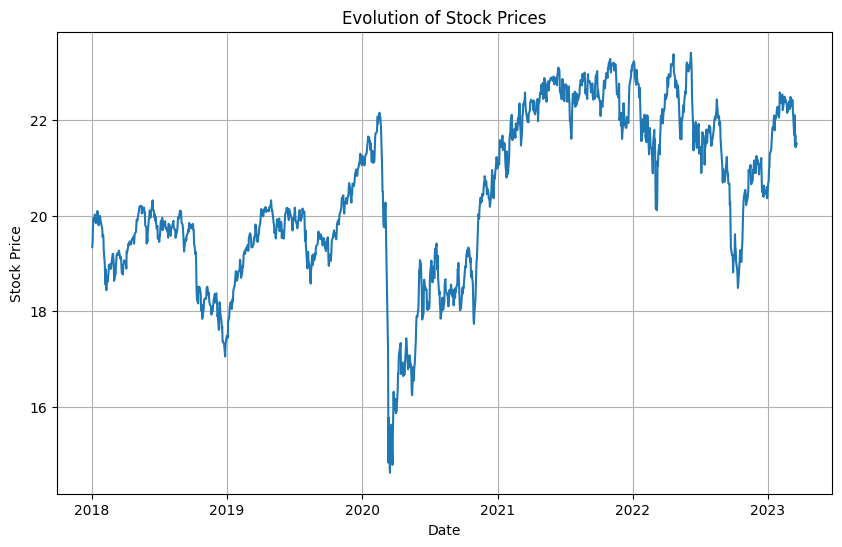

In [42]:
# Graphic representation
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataframe 'df_TDA'

# Convert the 'Date' column to datetime type
df_TDA['Date'] = pd.to_datetime(df_TDA['Date'])

# Set the 'Date' column as the index
df_TDA.set_index('Date', inplace=True)

# Calculate the mean stock prices across columns
mean_prices = df_TDA.mean(axis=1)

# Plot the mean stock prices
plt.figure(figsize=(10, 6))
plt.plot(mean_prices.index, mean_prices.values)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Evolution of Stock Prices')
plt.grid(True)
plt.show()
